# Python Imports

In [118]:
import os
import mimetypes
from google import genai
from google.genai import types
from PIL import Image
from uuid import uuid4
from dotenv import load_dotenv
from IPython.display import Image, display

# Loading Credentials from `.env`

In [119]:
load_dotenv(dotenv_path=".env", override=True)

API_KEY = os.environ.get("GEMINI_API_KEY", "")

# Initialize the client (Gemini Developer API)
client = genai.Client(api_key=API_KEY)

model = "gemini-2.5-flash-image-preview"

# Read multiple local images as bytes

In [120]:
image_paths = ["./virtual-try-on/red-dress.jpg", "./virtual-try-on/female-model.png"]  # First: dress, Second: model
image_parts = []
for i, image_path in enumerate(image_paths, start=1):
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image file not found: {image_path}")
    with open(image_path, "rb") as f:
        image_bytes = f.read()
    mime_type, _ = mimetypes.guess_type(image_path)
    if mime_type is None:
        mime_type = "image/jpeg" if image_path.lower().endswith('.jpg') else "image/png"
    image_parts.append(types.Part.from_bytes(data=image_bytes, mime_type=mime_type))

# Display `image_parts`

In [121]:
image_parts

[Part(
   inline_data=Blob(
     data=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xe2\x01\xd8ICC_PROFILE\x00\x01\x01\x00\x00\x01\xc8\x00\x00\x00\x00\x040\x00\x00mntrRGB XYZ \x07\xe0\x00\x01\x00\x01\x00\x00\x00\x00\x00\x00acsp\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...',
     mime_type='image/jpeg'
   )
 ),
 Part(
   inline_data=Blob(
     data=b"\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03\x80\x00\x00\x04\x80\x08\x02\x00\x00\x00!\xf1\xb4\x8e\x00\x00\x00\tpHYs\x00\x00\x00\x01\x00\x00\x00\x01\x00O%\xc4\xd6\x00\x00\x10\x00IDATx\x9ct\xbd\xf7W\x14Y\xd7\xfe}\xff\xf0~\xef1'\x82\x18\xc9\x99nr\xceYQ\t\xa2\x82\x8aD\xc7q\xcc\xa0...',
     mime_type='image/png'
   )
 )]

# Define the content: Prompt references the images explicitly

In [122]:
prompt = """Create a professional e-commerce fashion photo. 
Take the red dress from the first image and let the woman from the second image wear it.
Generate a realistic, full-body shot of the woman wearing the dress. 
Ensure the woman's face, her pose, and dress design and features remain completely unchanged.
The Dress should fit naturally to her body shape and posture, with realistic fabric folds and lighting effects. It should perfectly align with her shoulders,chest, waist, and hips, following the contours of her body.
It should not look photoshopped or artificial - it must appear as if she is genuinely wearing the dress not like a cut-and-paste job.
The dress must be the exact same design, color, pattern, and details as shown in the first image.
            
ABSOLUTELY CRITICAL - FACIAL FIDELITY: Preserve the EXACT facial features, bone structure, eye shape, nose shape, 
lip shape, eyebrow shape, and facial proportions from the uploaded person's photo. DO NOT add, remove, or modify any facial features. 
DO NOT change or add hairstyles, haircuts, or hair textures - keep the exact same hair as in the original photo.
DO NOT alter facial hair, makeup, or any other facial characteristics.
The face should be an EXACT replica of the uploaded photo with zero modifications or "improvements."

ABSOLUTELY CRITICAL - SKIN TONE CONSISTENCY: The person's face, neck, hands, arms, and ALL visible skin areas must have the EXACT SAME skin tone, ethnicity, and complexion as shown in the uploaded person's photo.
Do NOT mix different skin tones - if the person has light skin, ALL visible skin must be light; if they have dark skin, ALL visible skin must be dark. Ensure perfect skin tone uniformity across all visible body parts - the hands must match the face exactly. The background should be a smooth dark gray gradient transitioning from darker gray at the top to lighter gray at the bottom, exactly like professional product photography studio backgrounds. The dress should fit naturally on the person and look realistic. Make it look like a high-quality advertisement photo with a cropped, portrait-style framing. IMPORTANT: Do not include any watermarks, logos, text overlays, or branding marks from stock photo sites like Freepik, Shutterstock, or Getty Images. Generate a clean, professional image without any watermarks or text overlays.
Use the highest resolution and quality settings available to create a sharp, detailed image suitable for e-commerce fashion photography. The final image should look like it was taken by a professional photographer in a studio setting with perfect lighting and clarity.
"""


contents = [
        types.Content(
            role="user",
            parts=[
                types.Part.from_text(text=prompt),
                image_parts[0],  # First image: dress
                image_parts[1],  # Second image: model
            ]
        )
    ]

# Display `contents`

In [123]:
contents

[Content(
   parts=[
     Part(
       text="""Create a professional e-commerce fashion photo. 
 Take the red dress from the first image and let the woman from the second image wear it.
 Generate a realistic, full-body shot of the woman wearing the dress. 
 Ensure the woman's face, her pose, and dress design and features remain completely unchanged.
 The Dress should fit naturally to her body shape and posture, with realistic fabric folds and lighting effects. It should perfectly align with her shoulders,chest, waist, and hips, following the contours of her body.
 It should not look photoshopped or artificial - it must appear as if she is genuinely wearing the dress not like a cut-and-paste job.
 The dress must be the exact same design, color, pattern, and details as shown in the first image.
 
 ABSOLUTELY CRITICAL - FACIAL FIDELITY: Preserve the EXACT facial features, bone structure, eye shape, nose shape, 
 lip shape, eyebrow shape, and facial proportions from the uploaded person's p

# Plain dictionary config (no Pydantic)

In [124]:

generate_content_config = {
    "response_modalities": ["TEXT", "IMAGE"],  # Generate both text and image
    # "temperature": 0.7,  # Adjust for creativity (0-1)
    # "max_output_tokens": 200,  # Limit text length
}

# Generate content (synchronous non-streaming)

In [125]:
response = client.models.generate_content(
    model=model,
    contents=contents,
    config=generate_content_config,
)

# Display Response

In [126]:
response

GenerateContentResponse(
  automatic_function_calling_history=[],
  candidates=[
    Candidate(
      content=Content(
        parts=[
          Part(
            inline_data=Blob(
              data=<... Max depth ...>,
              mime_type=<... Max depth ...>
            )
          ),
        ],
        role='model'
      ),
      finish_reason=<FinishReason.STOP: 'STOP'>,
      index=0
    ),
  ],
  model_version='gemini-2.5-flash-image-preview',
  response_id='uDHJaLr0MJGGz7IP3f67kQE',
  sdk_http_response=HttpResponse(
    headers=<dict len=11>
  ),
  usage_metadata=GenerateContentResponseUsageMetadata(
    candidates_token_count=1290,
    candidates_tokens_details=[
      ModalityTokenCount(
        modality=<MediaModality.IMAGE: 'IMAGE'>,
        token_count=1290
      ),
    ],
    prompt_token_count=3129,
    prompt_tokens_details=[
      ModalityTokenCount(
        modality=<MediaModality.TEXT: 'TEXT'>,
        token_count=549
      ),
      ModalityTokenCount(
        mod

# Handle the response if its has text

In [127]:
if response.text:
    print("Generated Text:")
    print(response.text)

# Handle generated image (if present) save and display it


Generated Image saved to: ./generated-images/model_wearing_dress_cbac6b3a-18a8-4cfe-be38-970ae0cef8ea.png


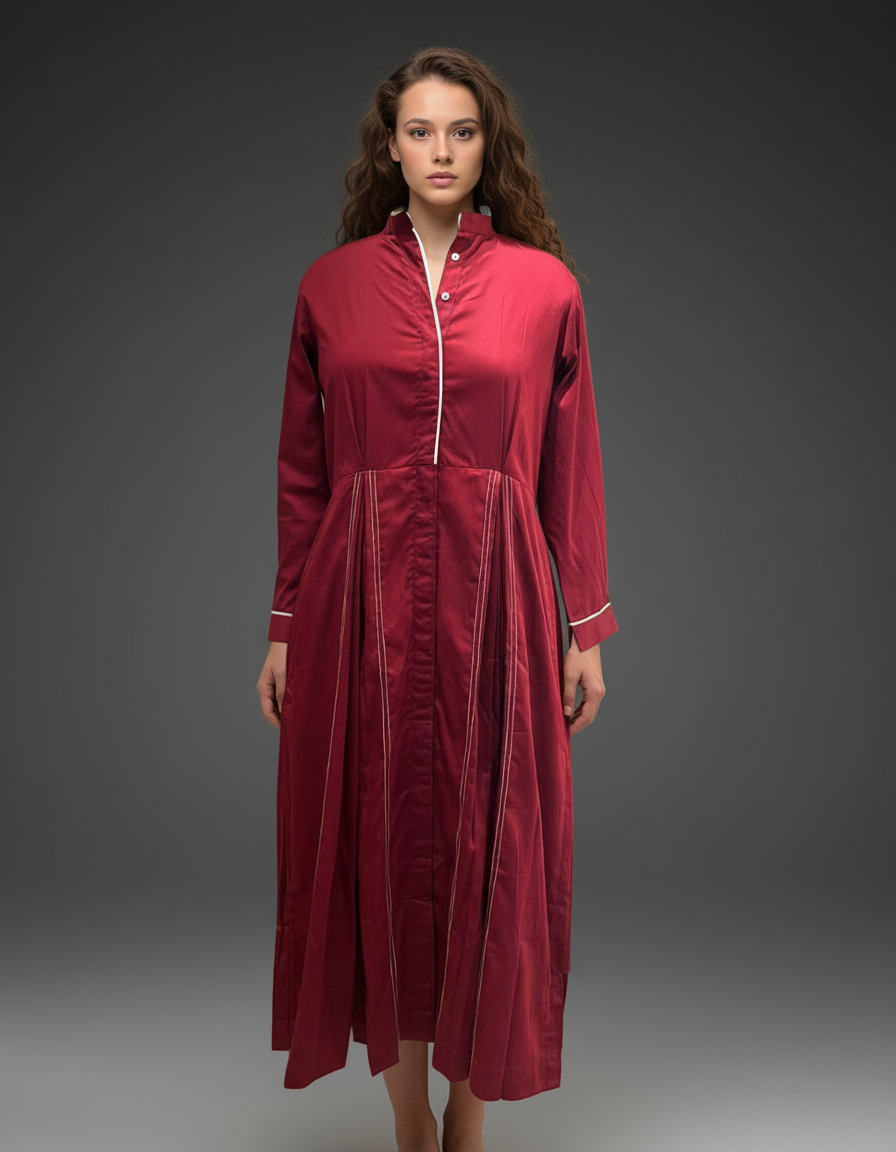

In [128]:
image_found = False
output_file = ""
for part in response.candidates[0].content.parts:
    if hasattr(part, "inline_data") and part.inline_data and part.inline_data.data:
        image_found = True
        mime_type = part.inline_data.mime_type
        data_buffer = part.inline_data.data  # Binary blob data
        file_extension = mimetypes.guess_extension(mime_type) or ".png"
        output_file = f"./generated-images/model_wearing_dress_{uuid4()}{file_extension}"
        with open(output_file, "wb") as f:
            f.write(data_buffer)
        print(f"\nGenerated Image saved to: {output_file}")
        break
if not image_found:
    print("\nNo image generated in this response.")

if image_found and output_file:
    display(Image(filename=output_file))